#### Crime Data Exploration Project
##### Mason Buller

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
crimes = pd.read_csv('crimereport.csv')
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2829 entries, 0 to 2828
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   report_year          2829 non-null   int64  
 1   agency_code          2788 non-null   object 
 2   agency_jurisdiction  2829 non-null   object 
 3   population           2760 non-null   float64
 4   violent_crimes       2794 non-null   float64
 5   homicides            2795 non-null   float64
 6   rapes                2754 non-null   float64
 7   assaults             2753 non-null   float64
 8   robberies            2754 non-null   float64
 9   months_reported      2692 non-null   float64
 10  crimes_percapita     2794 non-null   float64
 11  homicides_percapita  2795 non-null   float64
 12  rapes_percapita      2754 non-null   float64
 13  assaults_percapita   2753 non-null   float64
 14  robberies_percapita  2754 non-null   float64
dtypes: float64(12), int64(1), object(2)
me

In [2]:
crimes[crimes.isnull().any(axis=1)]

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
30,1975,KY05680,"Louisville, KY",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,1975,NaN,United States,NaN,1039710.0,20510.0,NaN,NaN,NaN,NaN,487.80,9.60,NaN,NaN,NaN
99,1976,KY05680,"Louisville, KY",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,1976,NaN,United States,NaN,1004210.0,18780.0,NaN,NaN,NaN,NaN,467.80,8.70,NaN,NaN,NaN
168,1977,KY05680,"Louisville, KY",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824,2015,OK07205,"Tulsa, OK",401520.0,3628.0,55.0,365.0,2354.0,854.0,NaN,903.57,13.70,90.90,586.27,212.69
2825,2015,VA12800,"Virginia Beach, VA",452797.0,626.0,19.0,103.0,234.0,270.0,NaN,138.25,4.20,22.75,51.68,59.63
2826,2015,DCMPD00,"Washington, DC",672228.0,8084.0,162.0,494.0,4024.0,3404.0,NaN,1202.57,24.10,73.49,598.61,506.38
2827,2015,KS08703,"Wichita, KS",389824.0,3839.0,27.0,349.0,2730.0,733.0,NaN,984.80,6.93,89.53,700.32,188.03


## Clean the Data

#### Drop the rows where the jurisdiction is United States

In [3]:
crimes.drop(crimes.loc[crimes['agency_jurisdiction']=="United States"].index, inplace=True)
crimes.query('agency_jurisdiction == "United States"')

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita


###### Source 1

### report_year

In [4]:
crimes.report_year.head()

0    1975
1    1975
2    1975
3    1975
4    1975
Name: report_year, dtype: int64

In [5]:
crimes[crimes.report_year.isnull()]

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita


In [6]:
crimes.report_year.value_counts()

report_year
1975    68
1996    68
1998    68
1999    68
2000    68
2001    68
2002    68
2003    68
2004    68
2005    68
2006    68
2007    68
2008    68
2009    68
2010    68
2011    68
2012    68
2013    68
2014    68
1997    68
1995    68
1976    68
1994    68
1977    68
1978    68
1979    68
1980    68
1981    68
1982    68
1983    68
1984    68
1985    68
1986    68
1987    68
1988    68
1989    68
1990    68
1991    68
1992    68
1993    68
2015    68
Name: count, dtype: int64

##### This column represents the jurisdiction reporting year. No dropping or filling was required.

c:\Users\mason\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mason\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


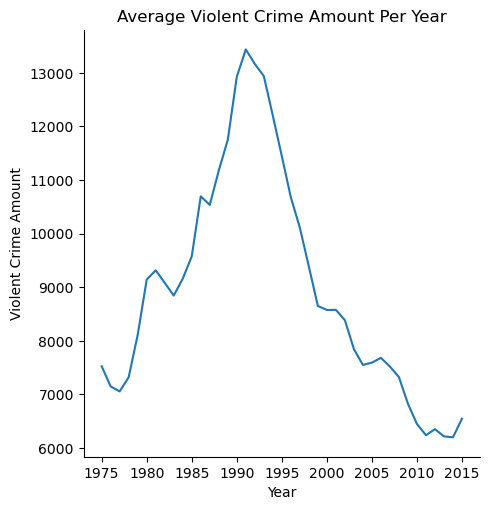

In [6]:
g = sns.relplot(data=crimes.groupby('report_year')['violent_crimes'].agg('mean'), kind='line')
for ax in g.axes.flat:
    ax.set_title('Average Violent Crime Amount Per Year')
    ax.set_ylabel('Violent Crime Amount')
    ax.set_xlabel('Year')

### agency_code

In [7]:
crimes.agency_code.head()

0    NM00101
1    TX22001
2    GAAPD00
3    CO00101
4    TX22701
Name: agency_code, dtype: object

In [8]:
crimes[crimes.agency_code.isnull()]

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita


In [9]:
crimes.agency_code.value_counts()

agency_code
NM00101    41
CA00109    41
PAPPD00    41
AZ00723    41
PAPEP00    41
           ..
CA01900    41
CA01942    41
KY05680    41
TNMPD00    41
KS08703    41
Name: count, Length: 68, dtype: int64

##### This column represents the unique agency code for each jurisdiction. No dropping or filling was required.

c:\Users\mason\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mason\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


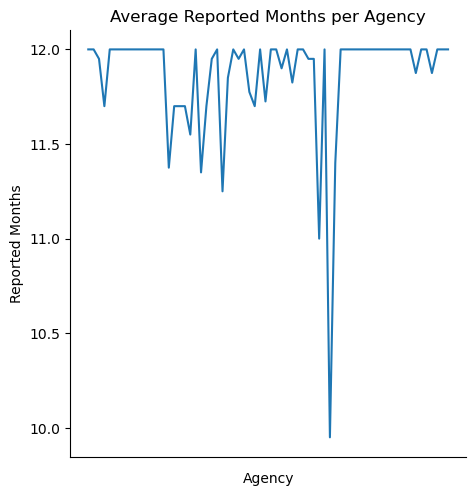

In [10]:
crimesAg = crimes.groupby('agency_code')['months_reported'].mean().reset_index(name='Count')
g = sns.relplot(data=crimesAg, x='agency_code', y='Count', kind='line')
for ax in g.axes.flat:
    ax.set_title('Average Reported Months per Agency')
    ax.set_ylabel('Reported Months')
    ax.set_xlabel('Agency')
    ax.set(xticklabels=[])
    ax.tick_params(bottom=False)

###### Source 2

### agency_jurisdiction

In [11]:
crimes.agency_jurisdiction.head()

0    Albuquerque, NM
1      Arlington, TX
2        Atlanta, GA
3         Aurora, CO
4         Austin, TX
Name: agency_jurisdiction, dtype: object

In [12]:
crimes[crimes.agency_jurisdiction.isnull()]

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita


In [13]:
crimes.agency_jurisdiction.value_counts()

agency_jurisdiction
Albuquerque, NM           41
Oakland, CA               41
Pittsburgh, PA            41
Phoenix, AZ               41
Philadelphia, PA          41
                          ..
Los Angeles County, CA    41
Los Angeles, CA           41
Louisville, KY            41
Memphis, TN               41
Wichita, KS               41
Name: count, Length: 68, dtype: int64

##### This column represents the city and state that make up each jurisdiction. No dropping or filling was required.

c:\Users\mason\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mason\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


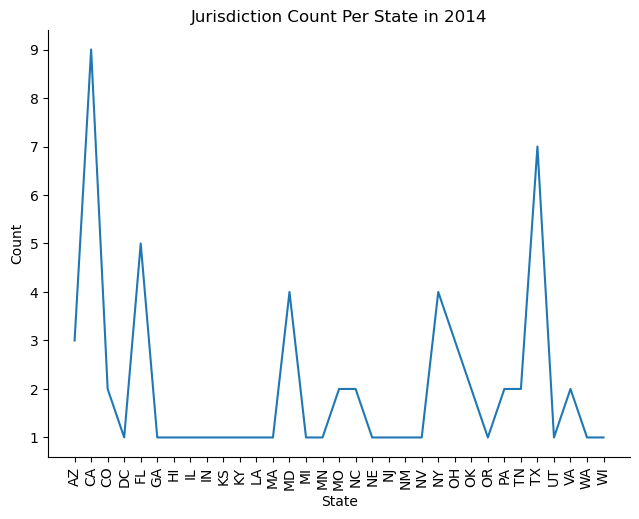

In [14]:
crimes['city'] = crimes['agency_jurisdiction'].str.split(', ').str[0]
crimes['state'] = crimes['agency_jurisdiction'].str.split(', ').str[1]
crimesSt = crimes.query('report_year == 2014').groupby('state')['city'].count()

g = sns.relplot(data=crimesSt, kind='line', aspect=1.3)
for ax in g.axes.flat:
    ax.set_title('Jurisdiction Count Per State in 2014')
    ax.set_ylabel('Count')
    ax.set_xlabel('State')
    ax.tick_params('x', labelrotation=90)

### population

In [15]:
crimes.population.head()

0    286238.0
1    112478.0
2    490584.0
3    116656.0
4    300400.0
Name: population, dtype: float64

In [16]:
crimes[crimes.population.isnull()]

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,city,state
30,1975,KY05680,"Louisville, KY",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY
99,1976,KY05680,"Louisville, KY",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY
168,1977,KY05680,"Louisville, KY",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY
237,1978,KY05680,"Louisville, KY",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY
306,1979,KY05680,"Louisville, KY",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY
375,1980,KY05680,"Louisville, KY",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY
444,1981,KY05680,"Louisville, KY",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY
513,1982,KY05680,"Louisville, KY",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY
582,1983,KY05680,"Louisville, KY",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY
651,1984,KY05680,"Louisville, KY",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY


In [17]:
crimes.dropna(subset=['population'], inplace=True)
crimes[crimes.population.isnull()]

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,city,state


##### This column represents the population count for the each year in each jurisdiction. I dropped the rows with NaN for population because the population isn't necessarily 0 for these rows, it just wasn't reported. There's such a large gap of time where there was no reports of crime rates, so filling in the values could heavily skew the data.

c:\Users\mason\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mason\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


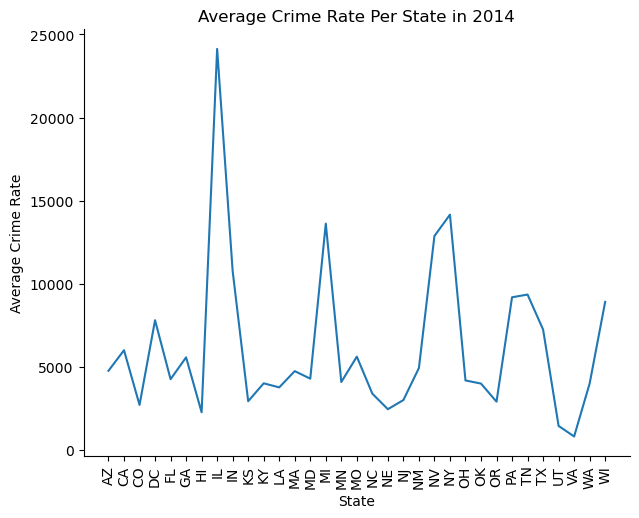

In [18]:
g = sns.relplot(data=crimes.query('report_year == 2014').groupby(['state'])['violent_crimes'].mean(), kind='line', legend=False, aspect=1.3)
for ax in g.axes.flat:
    ax.set_title('Average Crime Rate Per State in 2014')
    ax.set_ylabel('Average Crime Rate')
    ax.set_xlabel('State')
    ax.tick_params('x', labelrotation=90)

### violent_crimes

In [19]:
crimes.violent_crimes.head()

0    2383.0
1     278.0
2    8033.0
3     611.0
4    1215.0
Name: violent_crimes, dtype: float64

In [20]:
crimes[crimes.violent_crimes.isnull()]

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,city,state
921,1988,FL01602,"Jacksonville, FL",645024.0,NaN,187.0,573.0,NaN,4299.0,0.0,NaN,28.99,88.83,NaN,666.49,Jacksonville,FL
959,1988,FL02902,"Tampa, FL",293732.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Tampa,FL
1529,1997,OHCIP00,"Cincinnati, OH",360875.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Cincinnati,OH
1598,1998,OHCIP00,"Cincinnati, OH",344828.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Cincinnati,OH
2765,2015,MD00301,"Baltimore County, MD",828871.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Baltimore County,MD
2772,2015,OHCLP00,"Cleveland, OH",388655.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cleveland,OH
2810,2015,OR02602,"Portland, OR",615672.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Portland,OR


In [21]:
m = crimes.agency_code=="FL01602"
crimes.loc[m, 'violent_crimes'] = crimes.loc[m, 'violent_crimes'].fillna(method='bfill')

m = crimes.agency_code=="FL02902"
crimes.loc[m, 'violent_crimes'] = crimes.loc[m, 'violent_crimes'].fillna(method='bfill')

m = crimes.agency_code=="OHCIP00"
crimes.loc[m, 'violent_crimes'] = crimes.loc[m, 'violent_crimes'].fillna(method='bfill')

m = crimes.agency_code=="MD00301"
crimes.loc[m, 'violent_crimes'] = crimes.loc[m, 'violent_crimes'].fillna(method='ffill')

m = crimes.agency_code=="OR02602"
crimes.loc[m, 'violent_crimes'] = crimes.loc[m, 'violent_crimes'].fillna(method='ffill')

m = crimes.agency_code=="OHCLP00"
crimes.loc[m, 'violent_crimes'] = crimes.loc[m, 'violent_crimes'].fillna(method='ffill')

C:\Users\mason\AppData\Local\Temp\ipykernel_17660\3768090127.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  crimes.loc[m, 'violent_crimes'] = crimes.loc[m, 'violent_crimes'].fillna(method='bfill')
C:\Users\mason\AppData\Local\Temp\ipykernel_17660\3768090127.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  crimes.loc[m, 'violent_crimes'] = crimes.loc[m, 'violent_crimes'].fillna(method='bfill')
C:\Users\mason\AppData\Local\Temp\ipykernel_17660\3768090127.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  crimes.loc[m, 'violent_crimes'] = crimes.loc[m, 'violent_crimes'].fillna(method='bfill')
C:\Users\mason\AppData\Local\Temp\ipykernel_17660\3768090127.py:11: FutureWarning: Series.fillna with 'method' is deprecated an

###### Source 3

In [22]:
crimes[crimes.violent_crimes.isnull()]

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,city,state


##### The column represents the total violent crimes in each jurisdiction for each year. I chose to fill the values because there were so few and because I can filter out that there were zero months reported if I want more accurate data. I filtered by agency code so that the values being filled are based on the existing data for that jurisdiction only.

### homicides

In [23]:
crimes.homicides.head()

0     30.0
1      5.0
2    185.0
3      7.0
4     33.0
Name: homicides, dtype: float64

In [24]:
crimes[crimes.homicides.isnull()]

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,city,state
959,1988,FL02902,"Tampa, FL",293732.0,7910.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Tampa,FL
1529,1997,OHCIP00,"Cincinnati, OH",360875.0,2491.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Cincinnati,OH
1598,1998,OHCIP00,"Cincinnati, OH",344828.0,2491.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Cincinnati,OH
2765,2015,MD00301,"Baltimore County, MD",828871.0,4024.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Baltimore County,MD
2772,2015,OHCLP00,"Cleveland, OH",388655.0,5205.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cleveland,OH
2810,2015,OR02602,"Portland, OR",615672.0,2911.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Portland,OR


In [25]:
m = crimes.agency_code=="FL01602"
crimes.loc[m, 'homicides'] = crimes.loc[m, 'homicides'].fillna(method='bfill')

m = crimes.agency_code=="FL02902"
crimes.loc[m, 'homicides'] = crimes.loc[m, 'homicides'].fillna(method='bfill')

m = crimes.agency_code=="OHCIP00"
crimes.loc[m, 'homicides'] = crimes.loc[m, 'homicides'].fillna(method='bfill')

m = crimes.agency_code=="MD00301"
crimes.loc[m, 'homicides'] = crimes.loc[m, 'homicides'].fillna(method='ffill')

m = crimes.agency_code=="OR02602"
crimes.loc[m, 'homicides'] = crimes.loc[m, 'homicides'].fillna(method='ffill')

m = crimes.agency_code=="OHCLP00"
crimes.loc[m, 'homicides'] = crimes.loc[m, 'homicides'].fillna(method='ffill')

C:\Users\mason\AppData\Local\Temp\ipykernel_17660\505526403.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  crimes.loc[m, 'homicides'] = crimes.loc[m, 'homicides'].fillna(method='bfill')
C:\Users\mason\AppData\Local\Temp\ipykernel_17660\505526403.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  crimes.loc[m, 'homicides'] = crimes.loc[m, 'homicides'].fillna(method='bfill')
C:\Users\mason\AppData\Local\Temp\ipykernel_17660\505526403.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  crimes.loc[m, 'homicides'] = crimes.loc[m, 'homicides'].fillna(method='bfill')
C:\Users\mason\AppData\Local\Temp\ipykernel_17660\505526403.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. 

###### Source 3

In [26]:
crimes[crimes.homicides.isnull()]

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,city,state


##### This column represents the homicide count for each year in each jurisdiction. I used the same method to filter out the agency code and fill in the values because there were so few rows containing NaN values.

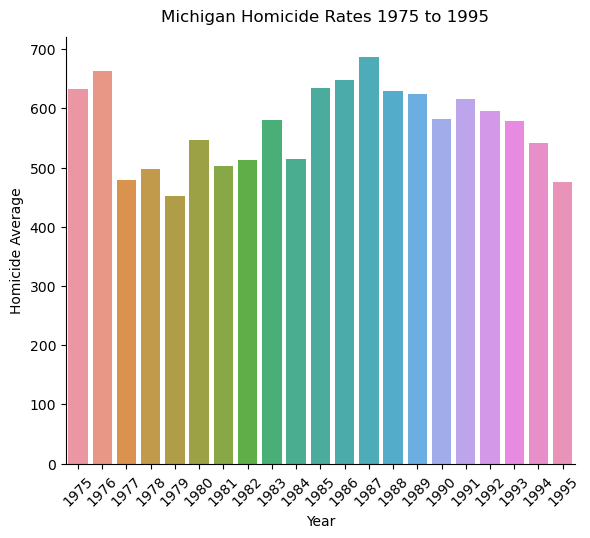

In [27]:
queryDf = pd.DataFrame(crimes.groupby(['report_year', 'state'])[['homicides']].mean().reset_index())

g = sns.catplot(data=queryDf.query('state == "MI" and report_year <= 1995'), kind='bar',
             x='report_year', y='homicides', aspect=1.2)
g.fig.suptitle('Michigan Homicide Rates 1975 to 1995', x=.55, y=1.025)
for ax in g.axes.flat:
    ax.set_ylabel('Homicide Average')
    ax.set_xlabel('Year')
    ax.tick_params('x', labelrotation=45)

### rapes

In [28]:
crimes.rapes.head()

0    181.0
1     28.0
2    443.0
3     44.0
4    190.0
Name: rapes, dtype: float64

In [29]:
crimes[crimes.rapes.isnull()]

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,city,state
959,1988,FL02902,"Tampa, FL",293732.0,7910.0,57.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Tampa,FL
1529,1997,OHCIP00,"Cincinnati, OH",360875.0,2491.0,28.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Cincinnati,OH
1598,1998,OHCIP00,"Cincinnati, OH",344828.0,2491.0,28.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Cincinnati,OH
2765,2015,MD00301,"Baltimore County, MD",828871.0,4024.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Baltimore County,MD
2772,2015,OHCLP00,"Cleveland, OH",388655.0,5205.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cleveland,OH
2810,2015,OR02602,"Portland, OR",615672.0,2911.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Portland,OR


In [30]:
m = crimes.agency_code=="FL01602"
crimes.loc[m, 'rapes'] = crimes.loc[m, 'rapes'].fillna(method='bfill')

m = crimes.agency_code=="FL02902"
crimes.loc[m, 'rapes'] = crimes.loc[m, 'rapes'].fillna(method='bfill')

m = crimes.agency_code=="OHCIP00"
crimes.loc[m, 'rapes'] = crimes.loc[m, 'rapes'].fillna(method='bfill')

m = crimes.agency_code=="MD00301"
crimes.loc[m, 'rapes'] = crimes.loc[m, 'rapes'].fillna(method='ffill')

m = crimes.agency_code=="OR02602"
crimes.loc[m, 'rapes'] = crimes.loc[m, 'rapes'].fillna(method='ffill')

m = crimes.agency_code=="OHCLP00"
crimes.loc[m, 'rapes'] = crimes.loc[m, 'rapes'].fillna(method='ffill')

C:\Users\mason\AppData\Local\Temp\ipykernel_17660\4246855207.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  crimes.loc[m, 'rapes'] = crimes.loc[m, 'rapes'].fillna(method='bfill')
C:\Users\mason\AppData\Local\Temp\ipykernel_17660\4246855207.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  crimes.loc[m, 'rapes'] = crimes.loc[m, 'rapes'].fillna(method='bfill')
C:\Users\mason\AppData\Local\Temp\ipykernel_17660\4246855207.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  crimes.loc[m, 'rapes'] = crimes.loc[m, 'rapes'].fillna(method='bfill')
C:\Users\mason\AppData\Local\Temp\ipykernel_17660\4246855207.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or o

###### Source 3

In [31]:
crimes[crimes.rapes.isnull()]

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,city,state


##### This column represents the rape count for each year in each jurisdiction.I used the same method to filter out the agency code and fill in the values because there were so few rows containing NaN values. 

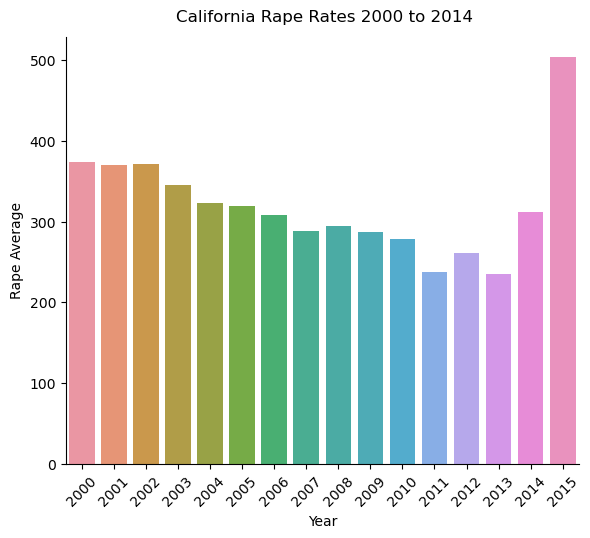

In [32]:
queryDf = pd.DataFrame(crimes.groupby(['report_year', 'state'])[['rapes']].mean().reset_index())

g = sns.catplot(data=queryDf.query('state == "CA" and report_year >= 2000'), kind='bar',
             x='report_year', y='rapes', aspect=1.2)
g.fig.suptitle('California Rape Rates 2000 to 2014', x=.55, y=1.025)
for ax in g.axes.flat:
    ax.set_ylabel('Rape Average')
    ax.set_xlabel('Year')
    ax.tick_params('x', labelrotation=45)

### assaults

In [33]:
crimes.assaults.head()

0    1353.0
1     132.0
2    3518.0
3     389.0
4     463.0
Name: assaults, dtype: float64

In [34]:
crimes[crimes.assaults.isnull()]

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,city,state
921,1988,FL01602,"Jacksonville, FL",645024.0,9449.0,187.0,573.0,NaN,4299.0,0.0,NaN,28.99,88.83,NaN,666.49,Jacksonville,FL
959,1988,FL02902,"Tampa, FL",293732.0,7910.0,57.0,175.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Tampa,FL
1529,1997,OHCIP00,"Cincinnati, OH",360875.0,2491.0,28.0,249.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Cincinnati,OH
1598,1998,OHCIP00,"Cincinnati, OH",344828.0,2491.0,28.0,249.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Cincinnati,OH
2765,2015,MD00301,"Baltimore County, MD",828871.0,4024.0,25.0,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Baltimore County,MD
2772,2015,OHCLP00,"Cleveland, OH",388655.0,5205.0,63.0,495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cleveland,OH
2810,2015,OR02602,"Portland, OR",615672.0,2911.0,26.0,262.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Portland,OR


In [35]:
m = crimes.agency_code=="FL01602"
crimes.loc[m, 'assaults'] = crimes.loc[m, 'assaults'].fillna(method='bfill')

m = crimes.agency_code=="FL02902"
crimes.loc[m, 'assaults'] = crimes.loc[m, 'assaults'].fillna(method='bfill')

m = crimes.agency_code=="OHCIP00"
crimes.loc[m, 'assaults'] = crimes.loc[m, 'assaults'].fillna(method='bfill')

m = crimes.agency_code=="MD00301"
crimes.loc[m, 'assaults'] = crimes.loc[m, 'assaults'].fillna(method='ffill')

m = crimes.agency_code=="OR02602"
crimes.loc[m, 'assaults'] = crimes.loc[m, 'assaults'].fillna(method='ffill')

m = crimes.agency_code=="OHCLP00"
crimes.loc[m, 'assaults'] = crimes.loc[m, 'assaults'].fillna(method='ffill')

C:\Users\mason\AppData\Local\Temp\ipykernel_17660\1273548893.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  crimes.loc[m, 'assaults'] = crimes.loc[m, 'assaults'].fillna(method='bfill')
C:\Users\mason\AppData\Local\Temp\ipykernel_17660\1273548893.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  crimes.loc[m, 'assaults'] = crimes.loc[m, 'assaults'].fillna(method='bfill')
C:\Users\mason\AppData\Local\Temp\ipykernel_17660\1273548893.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  crimes.loc[m, 'assaults'] = crimes.loc[m, 'assaults'].fillna(method='bfill')
C:\Users\mason\AppData\Local\Temp\ipykernel_17660\1273548893.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Us

###### Source 3

In [36]:
crimes.assaults.value_counts()

assaults
1005.0    5
2939.0    4
1892.0    4
1678.0    4
1776.0    4
         ..
7936.0    1
3914.0    1
3103.0    1
4606.0    1
4024.0    1
Name: count, Length: 2280, dtype: int64

##### This column represents the assault count for each year in each jurisdiction. I used the same method to filter out the agency code and fill in the values because there were so few rows containing NaN values.

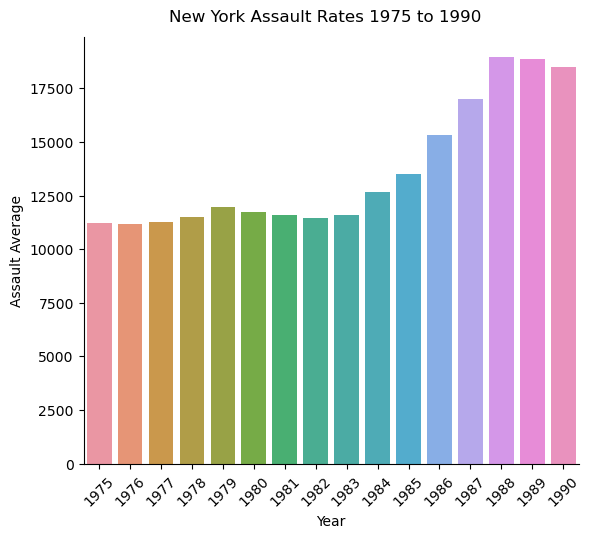

In [37]:
queryDf = pd.DataFrame(crimes.groupby(['report_year', 'state'])[['assaults']].mean().reset_index())

g = sns.catplot(data=queryDf.query('state == "NY" and report_year <= 1990'), kind='bar',
             x='report_year', y='assaults', aspect=1.2)
g.fig.suptitle('New York Assault Rates 1975 to 1990', x=.55, y=1.025)
for ax in g.axes.flat:
    ax.set_ylabel('Assault Average')
    ax.set_xlabel('Year')
    ax.tick_params('x', labelrotation=45)

### robberies

In [38]:
crimes.robberies.head()

0     819.0
1     113.0
2    3887.0
3     171.0
4     529.0
Name: robberies, dtype: float64

In [39]:
crimes[crimes.robberies.isnull()]

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,city,state
959,1988,FL02902,"Tampa, FL",293732.0,7910.0,57.0,175.0,4541.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Tampa,FL
1529,1997,OHCIP00,"Cincinnati, OH",360875.0,2491.0,28.0,249.0,1005.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Cincinnati,OH
1598,1998,OHCIP00,"Cincinnati, OH",344828.0,2491.0,28.0,249.0,1005.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Cincinnati,OH
2765,2015,MD00301,"Baltimore County, MD",828871.0,4024.0,25.0,97.0,2390.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Baltimore County,MD
2772,2015,OHCLP00,"Cleveland, OH",388655.0,5205.0,63.0,495.0,1655.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cleveland,OH
2810,2015,OR02602,"Portland, OR",615672.0,2911.0,26.0,262.0,1776.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Portland,OR


In [40]:
m = crimes.agency_code=="FL01602"
crimes.loc[m, 'robberies'] = crimes.loc[m, 'robberies'].fillna(method='bfill')

m = crimes.agency_code=="FL02902"
crimes.loc[m, 'robberies'] = crimes.loc[m, 'robberies'].fillna(method='bfill')

m = crimes.agency_code=="OHCIP00"
crimes.loc[m, 'robberies'] = crimes.loc[m, 'robberies'].fillna(method='bfill')

m = crimes.agency_code=="MD00301"
crimes.loc[m, 'robberies'] = crimes.loc[m, 'robberies'].fillna(method='ffill')

m = crimes.agency_code=="OR02602"
crimes.loc[m, 'robberies'] = crimes.loc[m, 'robberies'].fillna(method='ffill')

m = crimes.agency_code=="OHCLP00"
crimes.loc[m, 'robberies'] = crimes.loc[m, 'robberies'].fillna(method='ffill')

C:\Users\mason\AppData\Local\Temp\ipykernel_17660\2103837900.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  crimes.loc[m, 'robberies'] = crimes.loc[m, 'robberies'].fillna(method='bfill')
C:\Users\mason\AppData\Local\Temp\ipykernel_17660\2103837900.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  crimes.loc[m, 'robberies'] = crimes.loc[m, 'robberies'].fillna(method='bfill')
C:\Users\mason\AppData\Local\Temp\ipykernel_17660\2103837900.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  crimes.loc[m, 'robberies'] = crimes.loc[m, 'robberies'].fillna(method='bfill')
C:\Users\mason\AppData\Local\Temp\ipykernel_17660\2103837900.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future versi

###### Source 3

In [41]:
crimes.robberies.value_counts()

robberies
1381.0     6
768.0      5
818.0      5
620.0      5
1209.0     5
          ..
7877.0     1
213.0      1
3781.0     1
31063.0    1
733.0      1
Name: count, Length: 2148, dtype: int64

##### This column represents the robbery count for each year in each jurisdiction.I used the same method to filter out the agency code and fill in the values because there were so few rows containing NaN values.

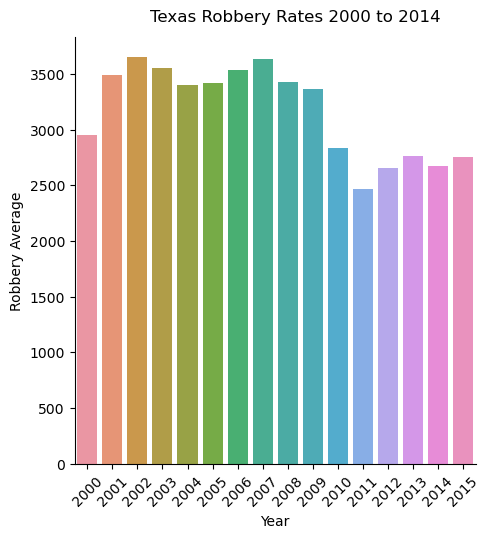

In [42]:
queryDf = pd.DataFrame(crimes.groupby(['report_year', 'state'])[['robberies']].mean().reset_index())

g = sns.catplot(data=queryDf.query('state == "TX" and report_year >= 2000'), kind='bar',
             x='report_year', y='robberies')
g.fig.suptitle('Texas Robbery Rates 2000 to 2014', x=.6, y=1.025)
for ax in g.axes.flat:
    ax.set_ylabel('Robbery Average')
    ax.set_xlabel('Year')
    ax.tick_params('x', labelrotation=45)

### months_reported

In [43]:
crimes.months_reported.head()

0    12.0
1    12.0
2    12.0
3    12.0
4    12.0
Name: months_reported, dtype: float64

In [44]:
crimes[crimes.months_reported.isnull()]

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,city,state
2760,2015,NM00101,"Albuquerque, NM",559721.0,5406.0,43.0,404.0,3273.0,1686.0,NaN,965.84,7.68,72.18,584.76,301.22,Albuquerque,NM
2761,2015,TX22001,"Arlington, TX",387565.0,1946.0,8.0,208.0,1201.0,529.0,NaN,502.11,2.06,53.67,309.88,136.49,Arlington,TX
2762,2015,GAAPD00,"Atlanta, GA",464710.0,5203.0,94.0,170.0,2944.0,1995.0,NaN,1119.62,20.23,36.58,633.51,429.30,Atlanta,GA
2763,2015,CO00101,"Aurora, CO",360237.0,1660.0,24.0,352.0,837.0,447.0,NaN,460.81,6.66,97.71,232.35,124.08,Aurora,CO
2764,2015,TX22701,"Austin, TX",938728.0,3497.0,23.0,487.0,2058.0,929.0,NaN,372.53,2.45,51.88,219.23,98.96,Austin,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2823,2015,AZ01003,"Tucson, AZ",529675.0,3472.0,31.0,422.0,1960.0,1059.0,NaN,655.50,5.85,79.67,370.04,199.93,Tucson,AZ
2824,2015,OK07205,"Tulsa, OK",401520.0,3628.0,55.0,365.0,2354.0,854.0,NaN,903.57,13.70,90.90,586.27,212.69,Tulsa,OK
2825,2015,VA12800,"Virginia Beach, VA",452797.0,626.0,19.0,103.0,234.0,270.0,NaN,138.25,4.20,22.75,51.68,59.63,Virginia Beach,VA
2826,2015,DCMPD00,"Washington, DC",672228.0,8084.0,162.0,494.0,4024.0,3404.0,NaN,1202.57,24.10,73.49,598.61,506.38,Washington,DC


In [45]:
crimes.dropna(subset=['months_reported'], inplace=True)

In [46]:
crimes.months_reported.value_counts()

months_reported
12.0    2639
0.0       18
11.0       9
10.0       7
8.0        4
9.0        3
6.0        3
5.0        3
3.0        2
4.0        2
7.0        1
1.0        1
Name: count, dtype: int64

##### This column represents how many months worth of data is shared. Not having reports for every month causes the data to fluctuate. Since it looked like there were only NaN values for all of the states in 2015, I just decided to drop those rows. 

c:\Users\mason\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mason\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


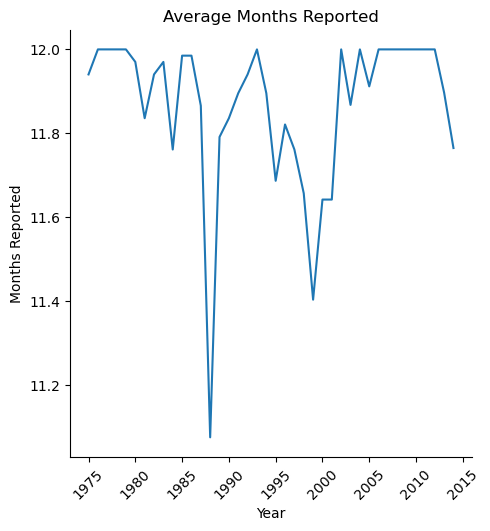

In [47]:
g= sns.relplot(data=crimes.groupby('report_year')['months_reported'].mean(), kind='line')
for ax in g.axes.flat:
    ax.set_title('Average Months Reported')
    ax.set_ylabel('Months Reported')
    ax.set_xlabel('Year')
    ax.tick_params('x', labelrotation=45)

## Predictive Analysis

In [48]:
heatmapDf = pd.DataFrame(crimes.groupby(['report_year'])[['population', 'violent_crimes', 'homicides', 'rapes', 'robberies']].mean().reset_index())
heatmapDf.head()

,report_year,population,violent_crimes,homicides,rapes,robberies
0,1975,706629.597015,7522.492537,136.507463,363.537313,4349.179104
1,1976,706297.985075,7144.791045,124.268657,357.134328,3994.089552
2,1977,706907.134328,7053.552239,125.507463,393.373134,3749.701493
3,1978,700319.208955,7318.626866,129.119403,420.119403,3820.298507
4,1979,700611.910448,8109.656716,147.537313,470.059701,4268.955224


<Axes: >

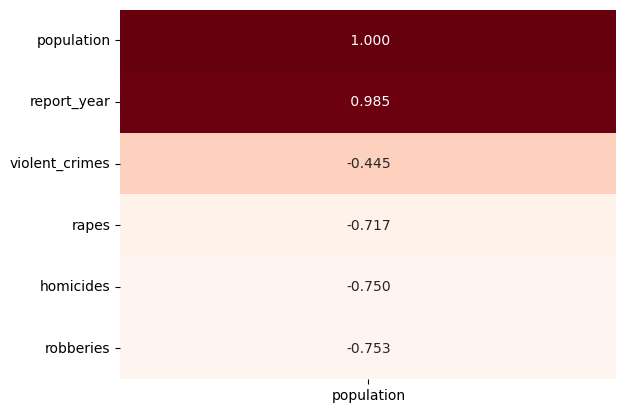

In [49]:
sns.heatmap(data=heatmapDf.corr(numeric_only=True)[['population']].sort_values(by='population', ascending=False), 
            annot=True, cmap='Reds', cbar=False, fmt=f' .3f')

<Axes: >

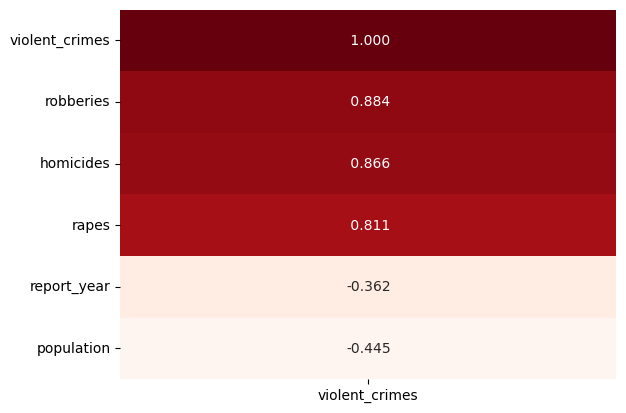

In [50]:
sns.heatmap(data=heatmapDf.corr(numeric_only=True)[['violent_crimes']].sort_values(by='violent_crimes', ascending=False), 
            annot=True, cmap='Reds', cbar=False, fmt=f' .3f')

##### For my single regression model I will be using the population as the dependent variable and the violent_crimes column as my independent variable. For my multiple regression model I will be using the violent crimes column as my dependent variable and the homicides, robberies, rapes, and report_year columns as my independent variables.

#### Single Regression Model

In [51]:
x_train, x_test, y_train, y_test = train_test_split(
    crimes[['population']], crimes[['violent_crimes']], test_size=0.30, random_state=20)
linearModel = LinearRegression()
linearModel.fit(x_train, y_train)
linearModel.score(x_test, y_test)

0.7092838749769192

In [52]:
y_predicted = linearModel.predict(x_test)
predicted = pd.DataFrame(y_predicted, columns=['violent_crimes_predicted'])
combined = predicted.join([x_test.reset_index(drop=True),
                           y_test.reset_index(drop=True)])
combined.head()

,violent_crimes_predicted,population,violent_crimes
0,8293.744829,739039.0,12160.0
1,8850.208015,779541.0,4891.0
2,4293.947570,447915.0,6536.0
3,3195.227482,367945.0,15420.0
4,2474.073065,315456.0,2364.0


In [53]:
melted = pd.melt(combined, id_vars=['population'], value_vars=['violent_crimes', 'violent_crimes_predicted'],
                 var_name='crime_type', value_name='crime_amount')
melted.head()

,population,crime_type,crime_amount
0,739039.0,violent_crimes,12160.0
1,779541.0,violent_crimes,4891.0
2,447915.0,violent_crimes,6536.0
3,367945.0,violent_crimes,15420.0
4,315456.0,violent_crimes,2364.0


c:\Users\mason\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mason\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


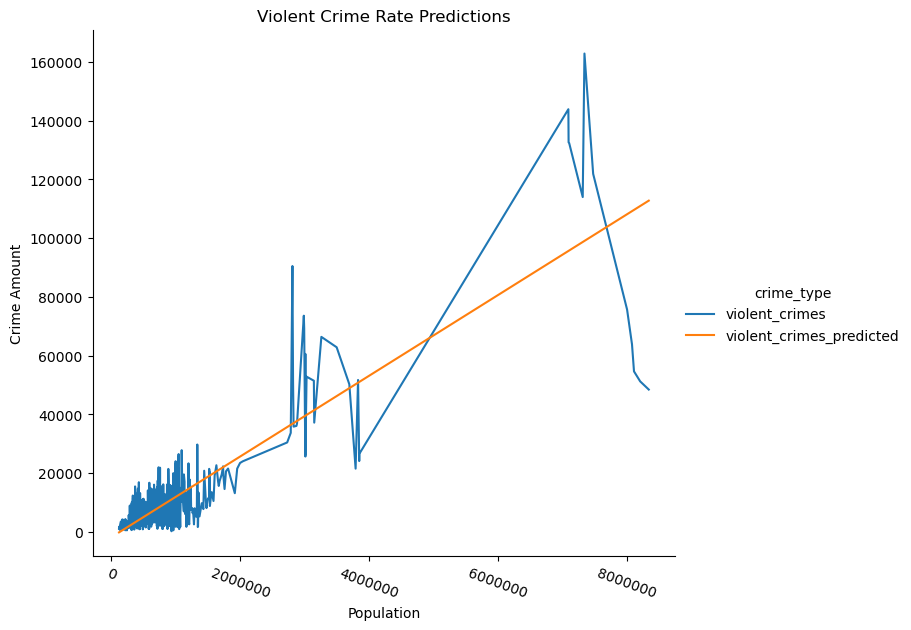

In [54]:
g = sns.relplot(data=melted, kind='line', x='population', y='crime_amount', hue='crime_type', 
                errorbar=None, height=6, aspect=1.2)
for ax in g.axes.flat:
    ax.set_title('Violent Crime Rate Predictions')
    ax.set_xlabel('Population')    
    ax.set_ylabel('Crime Amount')
    ax.ticklabel_format(style='plain', axis='x')
    ax.tick_params('x', labelrotation=-20)

##### The plot is definately a linear regression in the way that it's simply an increasing line. The linear regression isn't overly accurate in its predictions. While crime rates do increase with population size, other factors also influence it. Only having the population to go off of makes it difficult for it to get a super accurate prediction.

##### 

#### Multiple Regression Model

In [55]:
x_train, x_test, y_train, y_test = train_test_split(
    crimes[['homicides', 'rapes', 'robberies', 'report_year']], crimes[['violent_crimes']], test_size=0.30, random_state=20)
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9698276449292103

In [56]:
y_predicted = model.predict(x_test)
predicted = pd.DataFrame(y_predicted, columns=['violent_crimes_predicted'])
combined = predicted.join([x_test.reset_index(drop=True),
                           y_test.reset_index(drop=True)])
combined.head()

,violent_crimes_predicted,homicides,rapes,robberies,report_year,violent_crimes
0,12663.297842,95.0,400.0,7020.0,1991,12160.0
1,5507.290736,61.0,239.0,1795.0,2010,4891.0
2,6289.674830,126.0,295.0,2000.0,2005,6536.0
3,14174.009536,125.0,236.0,8477.0,1991,15420.0
4,1578.976743,17.0,120.0,407.0,1994,2364.0


In [57]:
melted = pd.melt(combined, id_vars=['report_year'], value_vars=['violent_crimes', 'violent_crimes_predicted'],
                 var_name='crime_type', value_name='crime_amount')
melted.head()

,report_year,crime_type,crime_amount
0,1991,violent_crimes,12160.0
1,2010,violent_crimes,4891.0
2,2005,violent_crimes,6536.0
3,1991,violent_crimes,15420.0
4,1994,violent_crimes,2364.0


c:\Users\mason\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mason\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


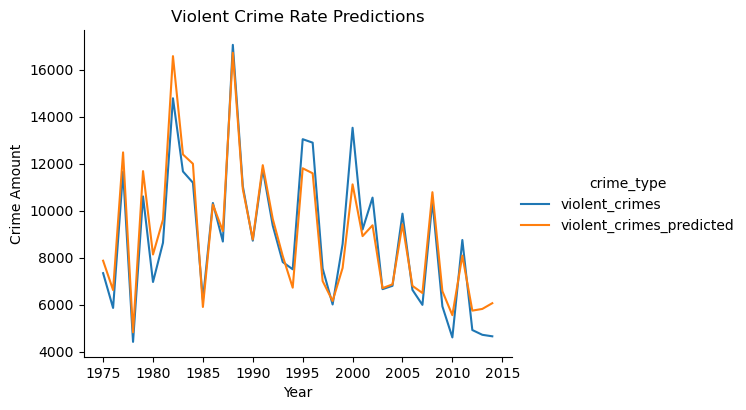

In [58]:
g = sns.relplot(data=melted, kind='line', x='report_year', y='crime_amount', hue='crime_type', 
                errorbar=None, height=4, aspect=1.4)
for ax in g.axes.flat:
    ax.set_title('Violent Crime Rate Predictions')
    ax.set_xlabel('Year')    
    ax.set_ylabel('Crime Amount')

##### The predicted values are pretty close to the actual values. Even if it's not super close, you can see that the trends in the data are similar in the way the lines form similar shapes. Towards the end the prediction is less accurate than in the beginning. It was slightly overestimating the values at the beginning so it started to cut back on its range towards the end. 

### General Analysis

#### What are the top 10 jurisdictions with the highest average crime rates?

In [59]:
crimes.groupby('agency_jurisdiction')['violent_crimes'].mean().sort_values(ascending=False).head(10)

agency_jurisdiction
New York City, NY        105329.900
Los Angeles, CA           48850.250
Chicago, IL               48405.575
Detroit, MI               22653.925
Houston, TX               19938.625
Philadelphia, PA          18676.725
Baltimore, MD             14777.200
Dallas, TX                14535.750
Miami-Dade County, FL     12347.050
Washington, DC            10646.325
Name: violent_crimes, dtype: float64

##### The more populated cities are expected to have higher crime rates.

#### What are the average crimes rates for each reporting year?

c:\Users\mason\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mason\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


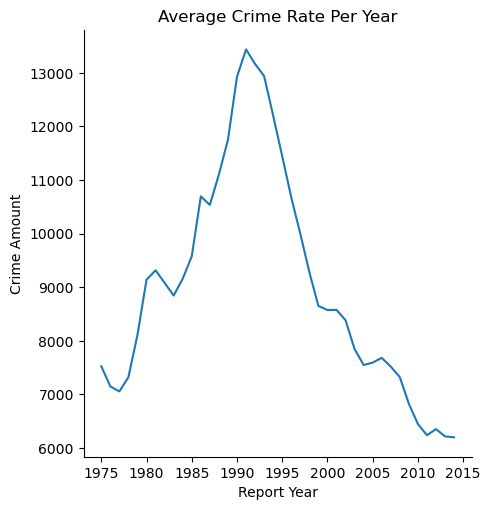

In [60]:
avgYear = crimes.groupby('report_year')['violent_crimes'].mean()
g = sns.relplot(data=avgYear, kind='line')
for ax in g.axes.flat:
    ax.set_title('Average Crime Rate Per Year')
    ax.set_xlabel('Report Year')    
    ax.set_ylabel('Crime Amount')

###### Source 4
##### The decline in crime rates following the peak in 1990 is known as the Great Crime Decline. There's no definitive answer as to why this decline happened, but there are many hypotheses. I feel like the advancements in technology could play a big part as to why rates declined. I would expect with growing populations that crime rates would increase as well.

#### What is the jurisdiction count and average population for each state?

c:\Users\mason\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mason\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mason\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mason\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

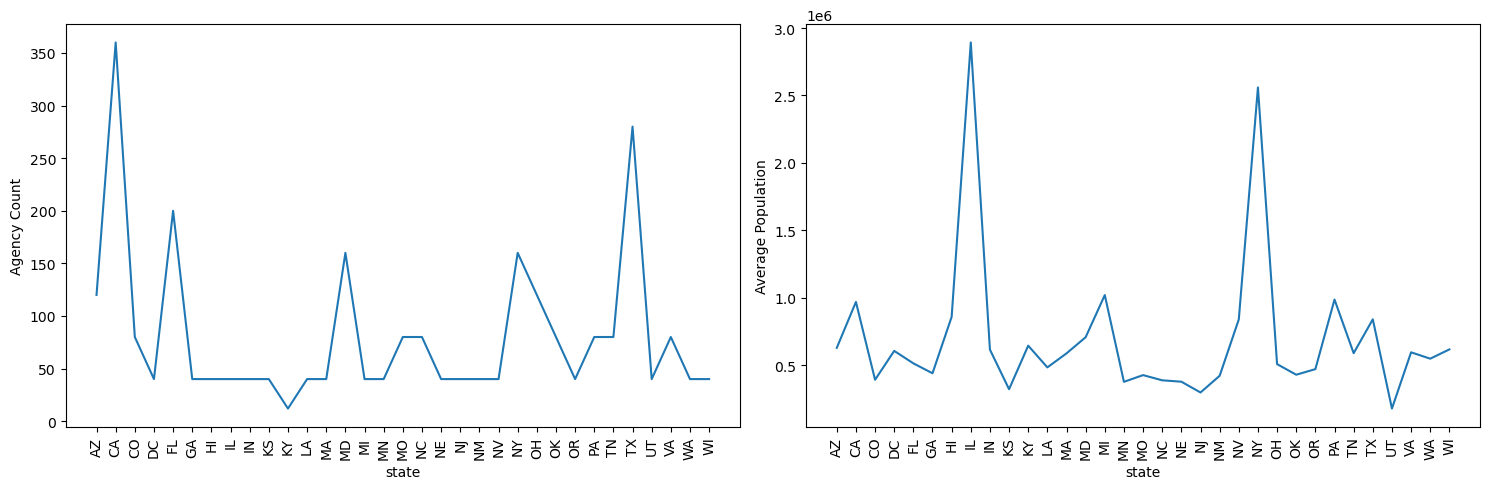

In [61]:
avgPop = pd.DataFrame(crimes.groupby('state').agg({'agency_jurisdiction' : 'count', 'population' : 'mean'}).sort_values(by='state').round(2))
avgPop.reset_index()
avgPop['Agency Count'] = avgPop['agency_jurisdiction']
avgPop['Average Population'] = avgPop['population']
plt.rcParams["figure.figsize"] = (15,5)
fig, (ax1, ax2) = plt.subplots(1,2)
sns.lineplot(data=avgPop, x='state', y='Agency Count', ax=ax1).tick_params('x', labelrotation=90)
sns.lineplot(data=avgPop, x='state', y='Average Population', ax=ax2).tick_params('x', labelrotation=90)
fig.tight_layout()
plt.show()

###### Source 5, 6
##### A lot of the states with higher populations have more jurisdictions. But, for some of the states, they have less jurisdictions despite having more people. This is due to the size of the state. New York has more than double the population that California does, but 200 less jurisdictions due to the much smaller geograpical size of the state.

#### What was the highest and lowest robbery amount in 2010?

In [62]:
crimes.query('report_year == 2010')[['robberies', 'agency_jurisdiction', 'population']].sort_values(by='robberies', ascending=False).head(10)

,robberies,agency_jurisdiction,population
2456,19608.0,"New York City, NY",8175133.0
2425,14213.0,"Chicago, IL",2695598.0
2444,10924.0,"Los Angeles, CA",3792621.0
2437,9449.0,"Houston, TX",2099451.0
2462,8363.0,"Philadelphia, PA",1526006.0
2431,5539.0,"Detroit, MI",713777.0
2429,4487.0,"Dallas, TX",1197816.0
2441,4003.0,"Las Vegas, NV",1446280.0
2481,3914.0,"Washington, DC",601723.0
2428,3369.0,"Columbus, OH",787033.0


##### It's expected that the jurisdictions with higher population amounts will have higher crimes rates.

#### What is the highest crime rate for each state?

In [63]:
highRates = crimes[['state', 'violent_crimes', 'report_year']].copy()
highRates.groupby('state').apply(lambda group: group.nlargest(1, columns='violent_crimes')).reset_index(level=-2, drop=True)

,state,violent_crimes,report_year
1290,AZ,11911.0,1993
1133,CA,89875.0,1991
360,CO,5520.0,1980
1308,DC,16888.0,1993
1275,FL,20761.0,1993
968,GA,16852.0,1989
1401,HI,2882.0,1995
1114,IL,90520.0,1991
2714,IN,10768.0,2014
2275,KS,3391.0,2007


###### Source 7
##### The data shows that a lot of the highest rates were during the early 1990's when crime rates were at their peak.

#### What is the average homicide rate for each state?

In [64]:
crimes.groupby('state')['homicides'].mean().sort_values(ascending=False)

state
IL    681.225000
MI    480.050000
NY    317.162500
DC    243.175000
LA    228.725000
PA    203.937500
GA    153.875000
CA    140.594444
MO    140.375000
TX    132.721429
TN    107.612500
WI     97.700000
NJ     97.500000
NV     96.925000
MD     96.800000
IN     92.550000
OH     90.075000
FL     80.785000
MA     75.125000
AZ     64.766667
KY     57.583333
OK     52.937500
MN     44.600000
NC     42.325000
NM     41.975000
WA     40.925000
CO     39.725000
OR     34.875000
NE     30.125000
HI     29.875000
KS     26.775000
VA     15.475000
UT     14.050000
Name: homicides, dtype: float64

##### It's not suprising to see that Illinois has one of the highest homicide rates because of Chicago. Michigan has a pretty low homicide rate typically.

#### What year had the highest average crime rate and what year had the lowest average crime rate?

In [65]:
crimes.groupby('report_year')['violent_crimes'].mean().sort_values(ascending=False)

report_year
1991    13437.552239
1992    13166.029851
1993    12939.746269
1990    12924.910448
1994    12200.686567
1989    11748.283582
1995    11444.044776
1988    11101.462687
1986    10693.895522
1996    10675.358209
1987    10534.835821
1997     9996.432836
1985     9574.522388
1981     9313.910448
1998     9280.164179
1984     9157.119403
1980     9139.074627
1982     9079.447761
1983     8842.029851
1999     8648.253731
2001     8575.044776
2000     8572.791045
2002     8383.059701
1979     8109.656716
2003     7844.058824
2006     7679.750000
2005     7590.088235
2004     7546.426471
1975     7522.492537
2007     7516.691176
2008     7320.014706
1978     7318.626866
1976     7144.791045
1977     7053.552239
2009     6823.323529
2010     6445.014706
2012     6349.088235
2011     6234.970588
2013     6213.338235
2014     6195.750000
Name: violent_crimes, dtype: float64

##### Seeing that 1991 was the highest and late 2010 is the lowest is expected due to the trends from the Great Crime Decline

#### What are the top 5 cities with the lowest average crime rate?

In [66]:
crimes.groupby('agency_jurisdiction')['violent_crimes'].mean().sort_values(ascending=True).head()

agency_jurisdiction
Fairfax County, VA     828.125
Virginia Beach, VA     835.400
Salt Lake City, UT    1268.675
Raleigh, NC           1561.075
Arlington, TX         1658.375
Name: violent_crimes, dtype: float64

##### Salt Lake City is very suprising due to the high tourism, so you'd expect more crime. Raleigh isn't as popular, but is also a frequently travelled to area. 

#### Sources

###### 1 Dropping the rows where the jurisdiction is United States
###### https://stackoverflow.com/a/52547461/20276058
###### 2 Removing x tick labels
###### https://stackoverflow.com/a/58476779/20276058
###### 3 Used to help me filter my agency code so that the values are being filled based on its own data, not data from different jurisdicions.
###### https://stackoverflow.com/a/58005933/20276058
###### 4 The Great Crime Decline
###### https://en.wikipedia.org/wiki/Crime_drop#:~:text=15%25%20to%20223.9.-,United%20States,the%20early%201990s%20to%202010.
###### 5 Using matplotlib to make subplots and display plots side by side
###### https://stackoverflow.com/a/63895570/20276058
###### 6 Changing the size of the plots
###### https://stackoverflow.com/a/41717533/20276058
###### 7 Used to display the year when selecting the highest crime rate for each state.
###### https://stackoverflow.com/a/63485139/20276058